In [1]:
#11.Modeling (Sentiment Analysis) Machine Learning

In [2]:
import pandas as pd
from pathlib import Path

In [3]:
current_dir = Path.cwd()
data_path = current_dir / "Industrial_and_Scientific.json"

print("current_dir:", current_dir)
print("data_path:", data_path)

current_dir: /Users/rebecca/Documents/CROUSE/Winter-2025/COMP262-NLP_RS/Project/W25_COMP262_002_TeamGamma
data_path: /Users/rebecca/Documents/CROUSE/Winter-2025/COMP262-NLP_RS/Project/W25_COMP262_002_TeamGamma/Industrial_and_Scientific.json


In [4]:
#load data

dataset = pd.read_json(data_path,orient='records',lines=True)

In [5]:
pd.set_option('display.max_colwidth', None)

In [6]:
dataset.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5,True,"01 23, 2013",A3FANY5GOT5X0W,0176496920,Kelly Keyser,"Arrived on time, in mint condition, great! I would buy something from this seller again in the future! Have a great day!",Just as described!,1358899200,NaN,NaN,NaN
1,5,True,"11 5, 2012",AT6HRPPYOPHMB,0176496920,Michael C,"This device was hard to find for my daughter's OT school class from the description provided by the teacher. Fortunately, the key words were adequate to find the correct device, and it works as needed.",Great device,1352073600,NaN,NaN,NaN
2,4,True,"10 17, 2012",A4IX7B38LIN1E,0176496920,BH,Just a clicker nothing special. Was hoping it came in the box but just bubble wrap and a slip of paper. No complaints though as it works perfectly and is full battery.,Pretty Good,1350432000,NaN,NaN,NaN
3,5,True,"03 29, 2017",A12Q4LR8N17AOZ,0176496920,Waterfall3500,Great response card. Slow shipping but it works! A lot cheaper than going to the bookstore to gauge your eyes out with the price. It's a shame. really. Making us poor college students who have no financial aid and no job. Just buy the used stuff!,Thank you for the great product. Works. A++ Used Response card. As described.,1490745600,NaN,NaN,NaN
4,1,True,"03 21, 2017",A1GJXZZPOZ3OD9,0176496920,Amazon Customer,It only lasted for 3 days before it stopped working,One Star,1490054400,NaN,NaN,NaN


In [7]:
dataset.describe()

,overall,unixReviewTime
count,1.758333e+06,1.758333e+06
mean,4.293547e+00,1.456127e+09
std,1.242332e+00,5.308999e+07
min,1.000000e+00,9.424512e+08
25%,4.000000e+00,1.426637e+09
50%,5.000000e+00,1.464307e+09
75%,5.000000e+00,1.494202e+09
max,5.000000e+00,1.538698e+09


In [8]:
dataset.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758333 entries, 0 to 1758332
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   overall         1758333 non-null  int64 
 1   verified        1758333 non-null  bool  
 2   reviewTime      1758333 non-null  object
 3   reviewerID      1758333 non-null  object
 4   asin            1758333 non-null  object
 5   reviewerName    1758223 non-null  object
 6   reviewText      1757349 non-null  object
 7   summary         1757930 non-null  object
 8   unixReviewTime  1758333 non-null  int64 
 9   vote            206308 non-null   object
 10  style           691514 non-null   object
 11  image           32710 non-null    object
dtypes: bool(1), int64(2), object(9)
memory usage: 149.2+ MB


In [9]:
#drop null column of reviewText
data_reviewText_without_nan = dataset.dropna(subset=['reviewText'])

In [10]:
data_reviewText_without_nan.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1757349 entries, 0 to 1758332
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   overall         1757349 non-null  int64 
 1   verified        1757349 non-null  bool  
 2   reviewTime      1757349 non-null  object
 3   reviewerID      1757349 non-null  object
 4   asin            1757349 non-null  object
 5   reviewerName    1757239 non-null  object
 6   reviewText      1757349 non-null  object
 7   summary         1757002 non-null  object
 8   unixReviewTime  1757349 non-null  int64 
 9   vote            206231 non-null   object
 10  style           691125 non-null   object
 11  image           32461 non-null    object
dtypes: bool(1), int64(2), object(9)
memory usage: 162.6+ MB


In [11]:
num_across_products = data_reviewText_without_nan['asin'].value_counts()

In [12]:
num_across_products.head(10)

asin
B00DRALJ28    14327
B00AZBIZTW    12178
B0013BKDO8    11756
B005KMDV9A     6358
B008YA6BWE     6152
B0002EQU6C     5846
B00837ZGRY     5531
B00C351GBC     4719
B00DMI632G     4429
B000F4OYMQ     4248
Name: count, dtype: int64

In [13]:
# check how many products in dataset
len(num_across_products)

165733

In [14]:
max(num_across_products.values)

14327

In [15]:
min(num_across_products.values)

1

In [16]:
# Check for duplicates
from collections import Counter
duplicated_bool_p_r_ID_o_n_rt_urt = data_reviewText_without_nan.duplicated(subset=['reviewText','asin','reviewerID','overall','reviewerName','reviewTime','unixReviewTime'], keep='first')

Counter(duplicated_bool_p_r_ID_o_n_rt_urt)

Counter({False: 1713516, True: 43833})

In [17]:
#keep first
data_unique = data_reviewText_without_nan.drop_duplicates(
    subset=['reviewText', 'asin', 'reviewerID', 'overall', 'reviewerName', 'reviewTime', 'unixReviewTime'],
    keep='first'
)

print(data_unique.shape)

(1713516, 12)


In [18]:
data_unique.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1713516 entries, 0 to 1758332
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   overall         1713516 non-null  int64 
 1   verified        1713516 non-null  bool  
 2   reviewTime      1713516 non-null  object
 3   reviewerID      1713516 non-null  object
 4   asin            1713516 non-null  object
 5   reviewerName    1713410 non-null  object
 6   reviewText      1713516 non-null  object
 7   summary         1713175 non-null  object
 8   unixReviewTime  1713516 non-null  int64 
 9   vote            200510 non-null   object
 10  style           667476 non-null   object
 11  image           31918 non-null    object
dtypes: bool(1), int64(2), object(9)
memory usage: 158.5+ MB


In [19]:
# remove product has only 1 review
product_review_counts = data_unique['asin'].value_counts()
valid_products = product_review_counts[product_review_counts > 1].index
data = data_unique[data_unique['asin'].isin(valid_products)]

In [20]:
data.shape

(1634850, 12)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1634850 entries, 0 to 1758332
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   overall         1634850 non-null  int64 
 1   verified        1634850 non-null  bool  
 2   reviewTime      1634850 non-null  object
 3   reviewerID      1634850 non-null  object
 4   asin            1634850 non-null  object
 5   reviewerName    1634745 non-null  object
 6   reviewText      1634850 non-null  object
 7   summary         1634516 non-null  object
 8   unixReviewTime  1634850 non-null  int64 
 9   vote            197482 non-null   object
 10  style           660848 non-null   object
 11  image           30626 non-null    object
dtypes: bool(1), int64(2), object(9)
memory usage: 151.2+ MB


In [22]:
#replace "" with nan in summary column

data['summary'] = data['summary'].fillna('').astype(str)

/var/folders/60/83kzkx2x4hs5zc8lx2tyc8lw0000gn/T/ipykernel_68231/1515914394.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['summary'] = data['summary'].fillna('').astype(str)


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1634850 entries, 0 to 1758332
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   overall         1634850 non-null  int64 
 1   verified        1634850 non-null  bool  
 2   reviewTime      1634850 non-null  object
 3   reviewerID      1634850 non-null  object
 4   asin            1634850 non-null  object
 5   reviewerName    1634745 non-null  object
 6   reviewText      1634850 non-null  object
 7   summary         1634850 non-null  object
 8   unixReviewTime  1634850 non-null  int64 
 9   vote            197482 non-null   object
 10  style           660848 non-null   object
 11  image           30626 non-null    object
dtypes: bool(1), int64(2), object(9)
memory usage: 151.2+ MB


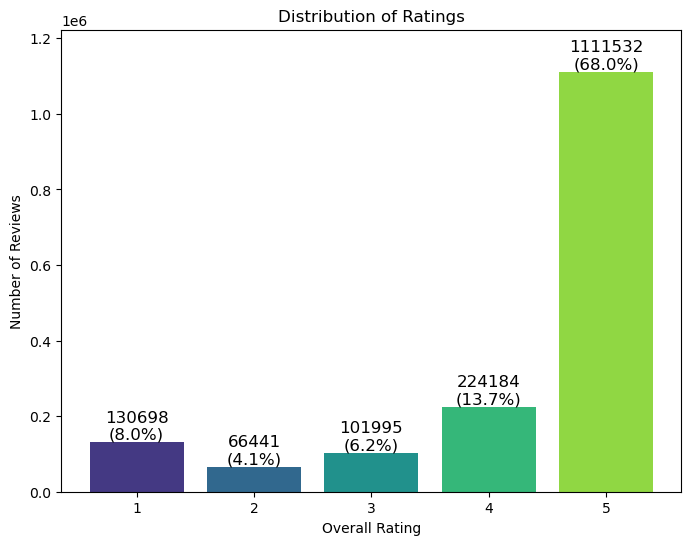

Ratings Distribution:
overall
1     130698
2      66441
3     101995
4     224184
5    1111532
Name: count, dtype: int64


In [24]:
from matplotlib import pyplot as plt
import seaborn as sns

rating_counts = data['overall'].value_counts().sort_index()
total_reviews = rating_counts.sum()

colors = sns.color_palette("viridis", len(rating_counts))

plt.figure(figsize=(8,6))
bars = plt.bar(rating_counts.index, rating_counts.values, color=colors)
plt.xlabel("Overall Rating")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Ratings")
plt.ylim(0, rating_counts.max() * 1.1)

for bar in bars:
    height = bar.get_height()
    percentage = (height / total_reviews) * 100
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f"{height}\n({percentage:.1f}%)",
             ha='center', va='bottom', fontsize=12)

plt.show()

print("Ratings Distribution:")
print(rating_counts)

In [25]:
# We map ratings 1 and 2 to NEGATIVE (0), 3 to NEUTRAL (1), and 4 and 5 to POSITIVE (2).
sentiment_score = {1: 0,
                   2: 0,
                   3: 1,
                   4: 2,
                   5: 2}
sentiment = {0: 'NEGATIVE', 1: 'NEUTRAL', 2: 'POSITIVE'}

In [26]:
data['overall'] = data['overall'].astype(int)
data['sentiment_score'] = data['overall'].map(sentiment_score)
data['label'] = data['sentiment_score'].map(sentiment)

/var/folders/60/83kzkx2x4hs5zc8lx2tyc8lw0000gn/T/ipykernel_68231/1679437791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['overall'] = data['overall'].astype(int)
/var/folders/60/83kzkx2x4hs5zc8lx2tyc8lw0000gn/T/ipykernel_68231/1679437791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment_score'] = data['overall'].map(sentiment_score)
/var/folders/60/83kzkx2x4hs5zc8lx2tyc8lw0000gn/T/ipykernel_68231/1679437791.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [27]:
data.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,sentiment_score,label
0,5,True,"01 23, 2013",A3FANY5GOT5X0W,0176496920,Kelly Keyser,"Arrived on time, in mint condition, great! I would buy something from this seller again in the future! Have a great day!",Just as described!,1358899200,NaN,NaN,NaN,2,POSITIVE
1,5,True,"11 5, 2012",AT6HRPPYOPHMB,0176496920,Michael C,"This device was hard to find for my daughter's OT school class from the description provided by the teacher. Fortunately, the key words were adequate to find the correct device, and it works as needed.",Great device,1352073600,NaN,NaN,NaN,2,POSITIVE
2,4,True,"10 17, 2012",A4IX7B38LIN1E,0176496920,BH,Just a clicker nothing special. Was hoping it came in the box but just bubble wrap and a slip of paper. No complaints though as it works perfectly and is full battery.,Pretty Good,1350432000,NaN,NaN,NaN,2,POSITIVE
3,5,True,"03 29, 2017",A12Q4LR8N17AOZ,0176496920,Waterfall3500,Great response card. Slow shipping but it works! A lot cheaper than going to the bookstore to gauge your eyes out with the price. It's a shame. really. Making us poor college students who have no financial aid and no job. Just buy the used stuff!,Thank you for the great product. Works. A++ Used Response card. As described.,1490745600,NaN,NaN,NaN,2,POSITIVE
4,1,True,"03 21, 2017",A1GJXZZPOZ3OD9,0176496920,Amazon Customer,It only lasted for 3 days before it stopped working,One Star,1490054400,NaN,NaN,NaN,0,NEGATIVE


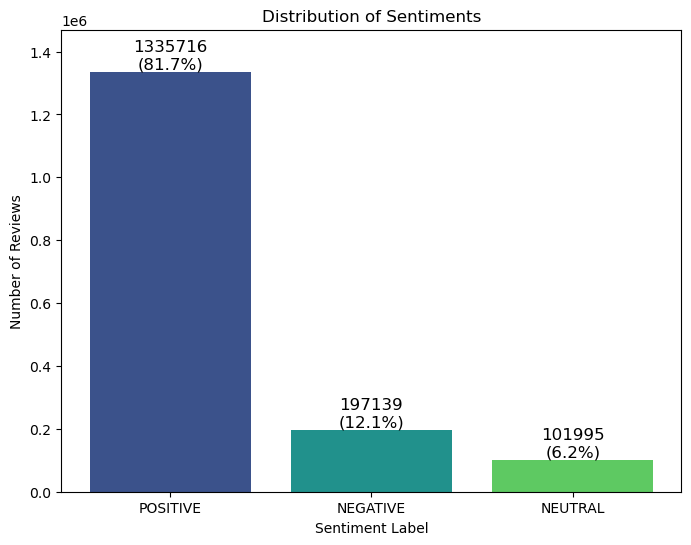

Sentiment Distribution:
label
POSITIVE    1335716
NEGATIVE     197139
NEUTRAL      101995
Name: count, dtype: int64


In [28]:
rating_counts = data['label'].value_counts()

total_reviews = rating_counts.sum()

colors = sns.color_palette("viridis", len(rating_counts))

plt.figure(figsize=(8,6))
bars = plt.bar(rating_counts.index, rating_counts.values, color=colors)

plt.xlabel("Sentiment Label")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Sentiments")
plt.ylim(0, rating_counts.max() * 1.1)

for bar in bars:
    height = bar.get_height()
    percentage = (height / total_reviews) * 100
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f"{height}\n({percentage:.1f}%)",
             ha='center', va='bottom', fontsize=12)

plt.show()

print("Sentiment Distribution:")
print(rating_counts)

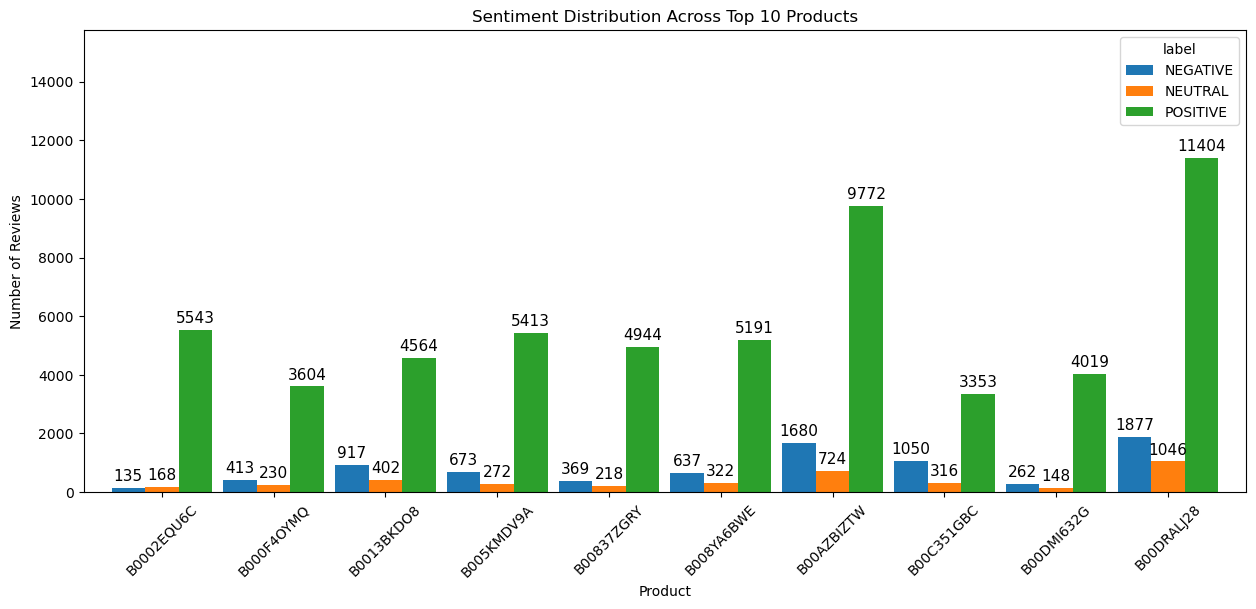

In [29]:
# Get the top 10 products based on the number of reviews (asin)
top_10_products = num_across_products.nlargest(10).index
data_top_10 = data[data['asin'].isin(top_10_products)]

# Count sentiments per product (asin) for the top 10 products
sentiment_counts = data_top_10.groupby(['asin', 'label']).size().unstack(fill_value=0)

# Plotting the sentiment distribution for the top 10 products
ax = sentiment_counts.plot(kind='bar', stacked=False, figsize=(15,6), width=0.9)
plt.title('Sentiment Distribution Across Top 10 Products')
plt.xlabel('Product')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=11, padding=3)
plt.ylim(0, num_across_products.max() * 1.1)
plt.show()

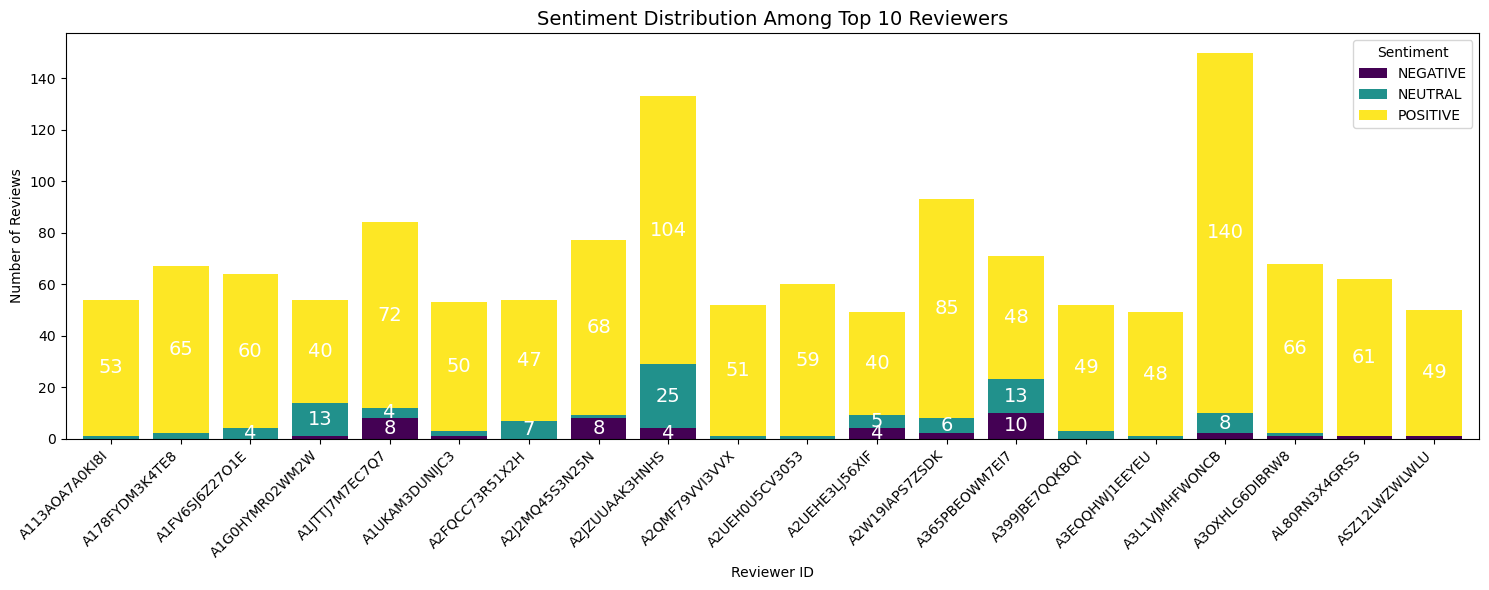

In [30]:
num_reviews_user = data['reviewerID'].value_counts()

top_20_users = num_reviews_user.nlargest(20).index

data_top_users = data[data['reviewerID'].isin(top_20_users)]

sentiment_counts = data_top_users.groupby(['reviewerID', 'label']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(15,6))
sentiment_counts.plot(kind='bar', stacked=True, ax=ax, width=0.8, colormap='viridis')

plt.title("Sentiment Distribution Among Top 10 Reviewers", fontsize=14)
plt.xlabel("Reviewer ID")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45, ha='right')

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 3:
            ax.text(bar.get_x() + bar.get_width()/2,
                    bar.get_y() + height / 2,
                    f"{int(height)}", ha='center', va='center', fontsize=14, color='white')

plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

In [31]:
# length
data['reviewText_length_words'] = data['reviewText'].apply(lambda x: len(str(x).split()))
correlation = data['reviewText_length_words'].corr(data['overall'])
print(f"\nCorrelation between review length and rating: {correlation:.2f}")


Correlation between review length and rating: -0.11


/var/folders/60/83kzkx2x4hs5zc8lx2tyc8lw0000gn/T/ipykernel_68231/2626919657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['reviewText_length_words'] = data['reviewText'].apply(lambda x: len(str(x).split()))


/var/folders/60/83kzkx2x4hs5zc8lx2tyc8lw0000gn/T/ipykernel_68231/937189411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = pd.cut(data['overall'],


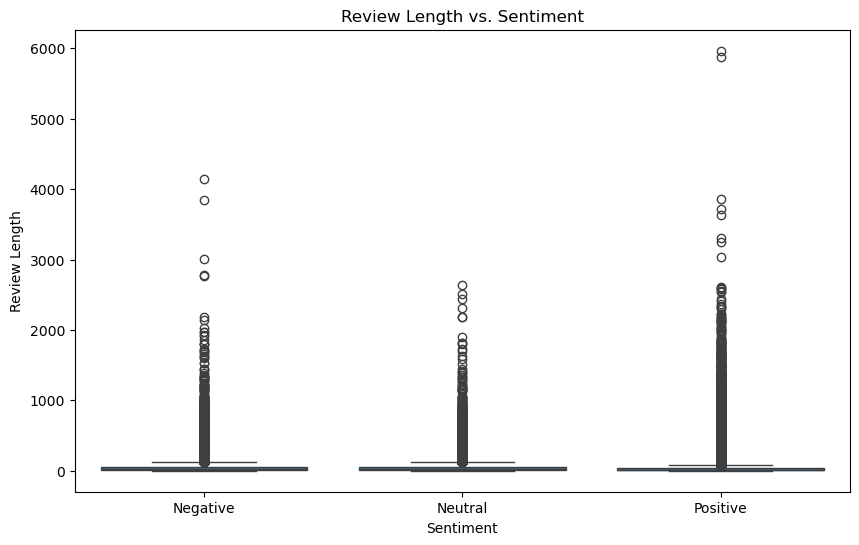

In [32]:
import numpy as np

data['sentiment'] = pd.cut(data['overall'],
                         bins=[-np.inf, 2, 3, np.inf],
                         labels=['Negative', 'Neutral', 'Positive'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='reviewText_length_words', data=data)
plt.title('Review Length vs. Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()

In [33]:
Q1 = data['reviewText_length_words'].quantile(0.25)
Q3 = data['reviewText_length_words'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data['reviewText_length_words'][(data['reviewText_length_words'] < lower_bound) | (data['reviewText_length_words'] > upper_bound)]
print(f"Number of outliers in review length: {len(outliers)}")

Number of outliers in review length: 140340


In [34]:
# Remove outliers
filtered_data = data[(data['reviewText_length_words'] >= lower_bound) & 
                     (data['reviewText_length_words'] <= upper_bound)]

filtered_data = filtered_data[['reviewText', 'summary', 'label']]

print(f"Filtered data shape: {filtered_data.shape}")

Filtered data shape: (1494510, 3)


In [35]:
filtered_data.head()

,reviewText,summary,label
0,"Arrived on time, in mint condition, great! I would buy something from this seller again in the future! Have a great day!",Just as described!,POSITIVE
1,"This device was hard to find for my daughter's OT school class from the description provided by the teacher. Fortunately, the key words were adequate to find the correct device, and it works as needed.",Great device,POSITIVE
2,Just a clicker nothing special. Was hoping it came in the box but just bubble wrap and a slip of paper. No complaints though as it works perfectly and is full battery.,Pretty Good,POSITIVE
3,Great response card. Slow shipping but it works! A lot cheaper than going to the bookstore to gauge your eyes out with the price. It's a shame. really. Making us poor college students who have no financial aid and no job. Just buy the used stuff!,Thank you for the great product. Works. A++ Used Response card. As described.,POSITIVE
4,It only lasted for 3 days before it stopped working,One Star,NEGATIVE


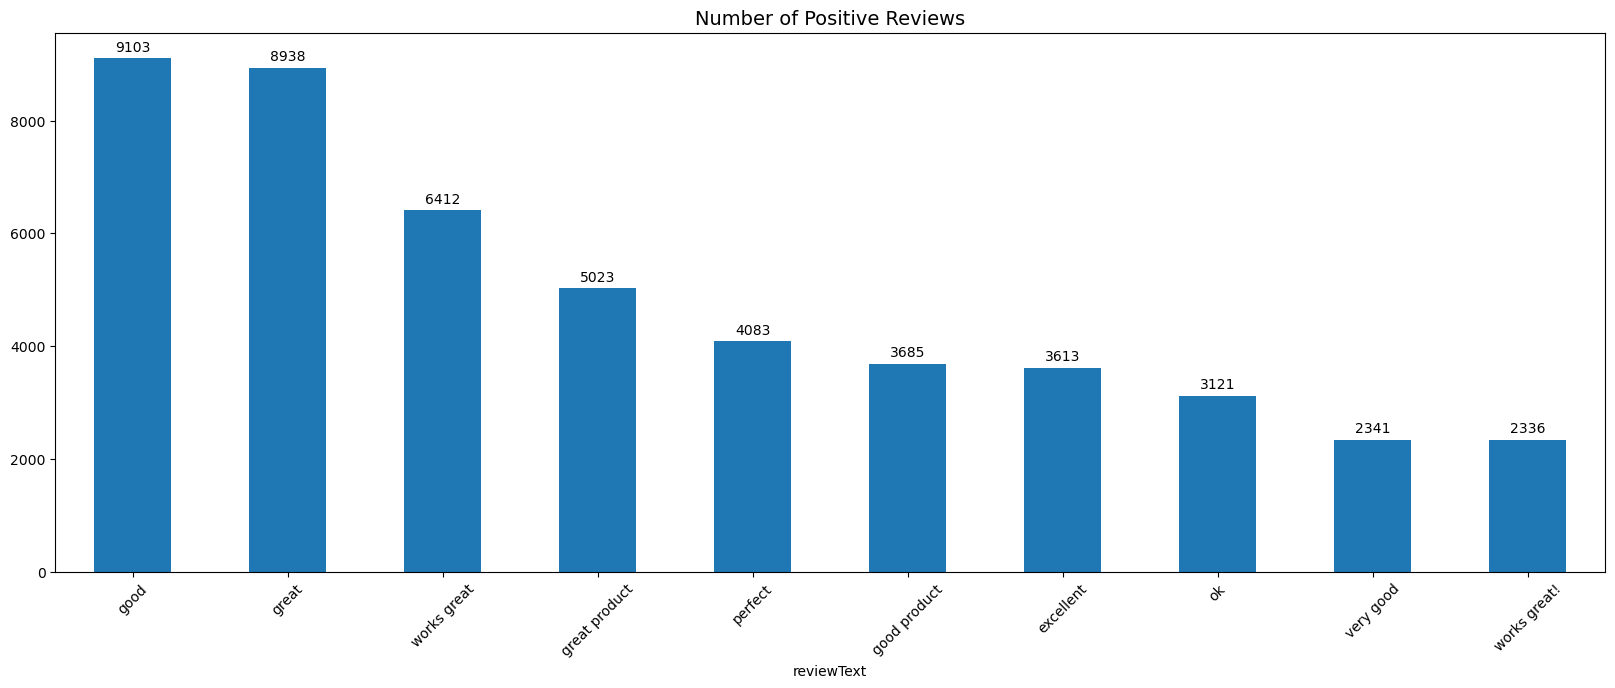

In [36]:
positive_review_counts = filtered_data[filtered_data['label'] == 'POSITIVE']['reviewText'].str.lower().value_counts().head(10)

fig, ax = plt.subplots(figsize=(20, 7))
bars = positive_review_counts.plot(kind='bar', ax=ax)

plt.title('Number of Positive Reviews', fontsize=14)
plt.xticks(rotation=45)
ax.bar_label(bars.containers[0], fmt='%d', label_type='edge', fontsize=10, padding=3)
plt.show()

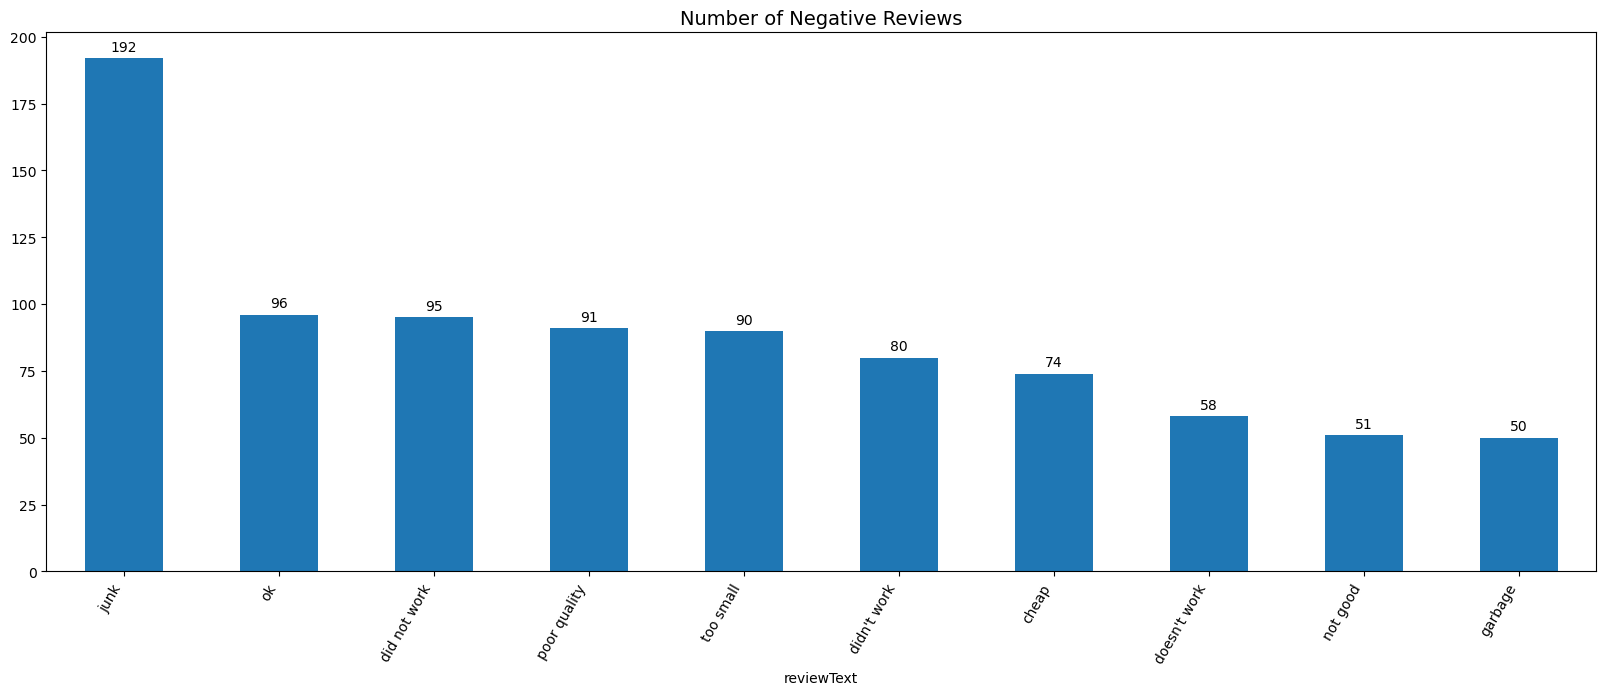

In [37]:
negative_review_counts = data[data['label'] == 'NEGATIVE']['reviewText'].str.lower().value_counts().head(10)

short_labels = [text[:50] + "..." if len(text) > 50 else text for text in negative_review_counts.index]

fig, ax = plt.subplots(figsize=(20, 7))
bars = negative_review_counts.plot(kind='bar', ax=ax)

plt.title('Number of Negative Reviews', fontsize=14)
plt.xticks(range(len(short_labels)), short_labels, rotation=60, ha='right')
ax.bar_label(bars.containers[0], fmt='%d', label_type='edge', fontsize=10, padding=3)
plt.show()

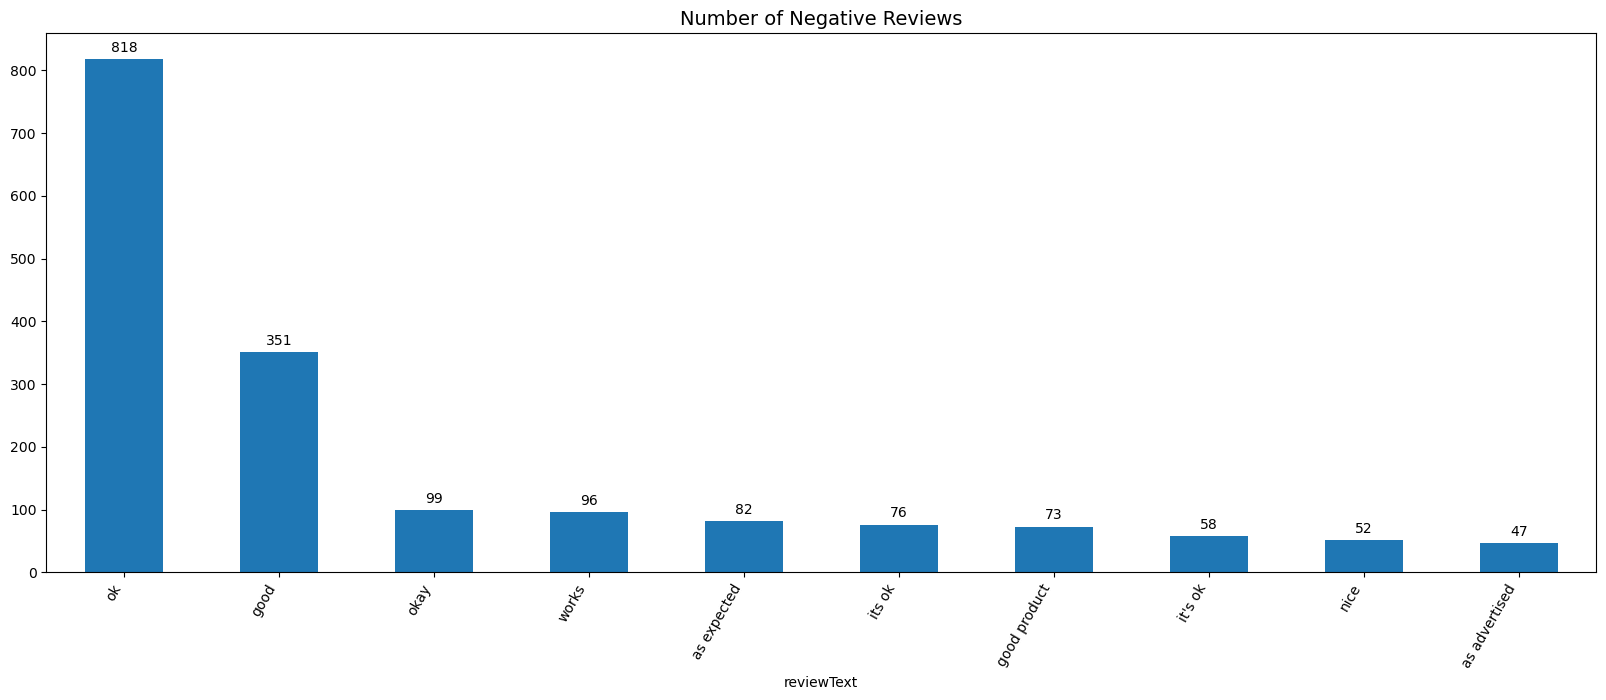

In [38]:
neutral_review_counts = data[data['label'] == 'NEUTRAL']['reviewText'].str.lower().value_counts().head(10)

short_labels = [text[:50] + "..." if len(text) > 50 else text for text in neutral_review_counts.index]

fig, ax = plt.subplots(figsize=(20, 7))
bars = neutral_review_counts.plot(kind='bar', ax=ax)

plt.title('Number of Negative Reviews', fontsize=14)
plt.xticks(range(len(short_labels)), short_labels, rotation=60, ha='right')
ax.bar_label(bars.containers[0], fmt='%d', label_type='edge', fontsize=10, padding=3)
plt.show()

In [39]:
# preprocessing

filtered_data['summary'] = filtered_data['summary'].fillna('').astype(str)

filtered_data['full_text'] = filtered_data['summary']+" "+filtered_data['reviewText']

In [40]:
filtered_data.head()

,reviewText,summary,label,full_text
0,"Arrived on time, in mint condition, great! I would buy something from this seller again in the future! Have a great day!",Just as described!,POSITIVE,"Just as described! Arrived on time, in mint condition, great! I would buy something from this seller again in the future! Have a great day!"
1,"This device was hard to find for my daughter's OT school class from the description provided by the teacher. Fortunately, the key words were adequate to find the correct device, and it works as needed.",Great device,POSITIVE,"Great device This device was hard to find for my daughter's OT school class from the description provided by the teacher. Fortunately, the key words were adequate to find the correct device, and it works as needed."
2,Just a clicker nothing special. Was hoping it came in the box but just bubble wrap and a slip of paper. No complaints though as it works perfectly and is full battery.,Pretty Good,POSITIVE,Pretty Good Just a clicker nothing special. Was hoping it came in the box but just bubble wrap and a slip of paper. No complaints though as it works perfectly and is full battery.
3,Great response card. Slow shipping but it works! A lot cheaper than going to the bookstore to gauge your eyes out with the price. It's a shame. really. Making us poor college students who have no financial aid and no job. Just buy the used stuff!,Thank you for the great product. Works. A++ Used Response card. As described.,POSITIVE,Thank you for the great product. Works. A++ Used Response card. As described. Great response card. Slow shipping but it works! A lot cheaper than going to the bookstore to gauge your eyes out with the price. It's a shame. really. Making us poor college students who have no financial aid and no job. Just buy the used stuff!
4,It only lasted for 3 days before it stopped working,One Star,NEGATIVE,One Star It only lasted for 3 days before it stopped working


In [41]:
import re
def clean_text(text):
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b', '', text)
    text = re.sub(r'http[s]?://\S+|www\.\S+', '', text)
    text = re.sub(r'[@#$%&*]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [42]:
filtered_data['full_clean'] = filtered_data['full_text'].apply(clean_text)

In [43]:
df_data = filtered_data[['label', 'full_clean']]

In [44]:
df_data.head()

,label,full_clean
0,POSITIVE,"Just as described! Arrived on time, in mint condition, great! I would buy something from this seller again in the future! Have a great day!"
1,POSITIVE,"Great device This device was hard to find for my daughter's OT school class from the description provided by the teacher. Fortunately, the key words were adequate to find the correct device, and it works as needed."
2,POSITIVE,Pretty Good Just a clicker nothing special. Was hoping it came in the box but just bubble wrap and a slip of paper. No complaints though as it works perfectly and is full battery.
3,POSITIVE,Thank you for the great product. Works. A++ Used Response card. As described. Great response card. Slow shipping but it works! A lot cheaper than going to the bookstore to gauge your eyes out with the price. It's a shame. really. Making us poor college students who have no financial aid and no job. Just buy the used stuff!
4,NEGATIVE,One Star It only lasted for 3 days before it stopped working


## Split data

In [45]:
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    df_data['full_clean'], df_data['label'], test_size=0.3, stratify=df_data['label'], random_state=55
)

In [46]:
# "NEGATIVE": 0, "NEUTRAL": 1, "POSITIVE": 2

In [47]:
label_mapping = {"NEGATIVE": 0, "NEUTRAL": 1, "POSITIVE": 2}
y_train_num = y_train.map(label_mapping)
y_test_num = y_test.map(label_mapping)

# Lexicons

### VADR

In [48]:
X_test_vader = X_test_raw.copy()
df_vader = pd.DataFrame({'text': X_test_vader, 'label': y_test})

In [49]:
df_vader.head()

,text,label
441217,Five Stars Great product. As described.,POSITIVE
1214928,Five Stars great deal on excellent product,POSITIVE
309168,Work great This ignitor worked great and was easy to install. I don't have the stove anymore but I never had issue with the ignitor. Yes I would buy it again,POSITIVE
1141933,Trouble free No issues printing on a multi color prusa. The finished product is stunning.,POSITIVE
1163723,"Five Stars Great printer, easy to set up, and you are off and printing.",POSITIVE


In [50]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [51]:
analyzer = SentimentIntensityAnalyzer()

In [52]:
vadr_score = []
compound_score = []
predict_label =[]

In [53]:
# positive sentiment: compound score >= 0.05
# neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
# negative sentiment: compound score <= -0.05

In [54]:
for sentence in df_vader['text']:
    vs = analyzer.polarity_scores(sentence)

    vadr_score.append(vs)

    compound_s = vs['compound']
    compound_score.append(compound_s)

    if compound_s >= 0.05:
        predict_label.append('POSITIVE')
    elif compound_s <= -0.05:
        predict_label.append('NEGATIVE')
    else:
        predict_label.append('NEUTRAL')

In [55]:
df_vader['vadr_score'] = vadr_score
df_vader['compound_score'] = compound_score
df_vader['predict_label'] = predict_label

In [56]:
df_vader.head()

,text,label,vadr_score,compound_score,predict_label
441217,Five Stars Great product. As described.,POSITIVE,"{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'compound': 0.6249}",0.6249,POSITIVE
1214928,Five Stars great deal on excellent product,POSITIVE,"{'neg': 0.0, 'neu': 0.391, 'pos': 0.609, 'compound': 0.8316}",0.8316,POSITIVE
309168,Work great This ignitor worked great and was easy to install. I don't have the stove anymore but I never had issue with the ignitor. Yes I would buy it again,POSITIVE,"{'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'compound': 0.8625}",0.8625,POSITIVE
1141933,Trouble free No issues printing on a multi color prusa. The finished product is stunning.,POSITIVE,"{'neg': 0.225, 'neu': 0.505, 'pos': 0.271, 'compound': 0.25}",0.2500,POSITIVE
1163723,"Five Stars Great printer, easy to set up, and you are off and printing.",POSITIVE,"{'neg': 0.0, 'neu': 0.632, 'pos': 0.368, 'compound': 0.7906}",0.7906,POSITIVE


In [57]:
from sklearn.metrics import classification_report
report_vadr = classification_report(df_vader['label'], df_vader['predict_label'],output_dict=True)
print(report_vadr)

{'NEGATIVE': {'precision': 0.5666850907899854, 'recall': 0.5418281464082991, 'f1-score': 0.5539779265351865, 'support': 51090.0}, 'NEUTRAL': {'precision': 0.09005868340015107, 'recall': 0.1742747919946031, 'f1-score': 0.11875119708868033, 'support': 26682.0}, 'POSITIVE': {'precision': 0.9163885463289553, 'recall': 0.8602302870357628, 'f1-score': 0.8874218458574825, 'support': 370581.0}, 'accuracy': 0.783126242045888, 'macro avg': {'precision': 0.5243774401730307, 'recall': 0.525444408479555, 'f1-score': 0.5200503231604497, 'support': 448353.0}, 'weighted avg': {'precision': 0.8273638650038558, 'recall': 0.783126242045888, 'f1-score': 0.803681310857995, 'support': 448353.0}}


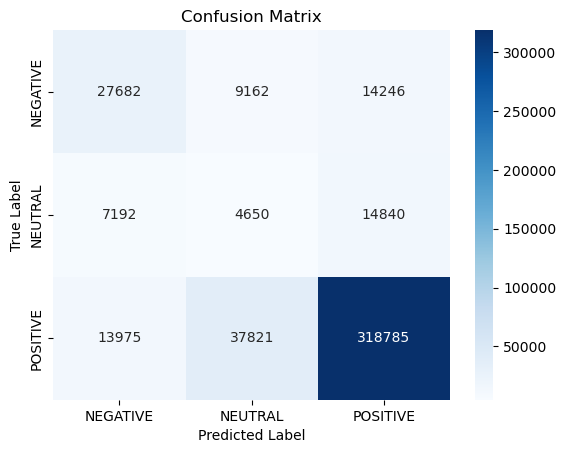

In [58]:
from sklearn.metrics import confusion_matrix

cm_vader = confusion_matrix(df_vader['label'], df_vader['predict_label'], labels=['NEGATIVE', 'NEUTRAL', 'POSITIVE'])
sns.heatmap(cm_vader, annot=True, fmt="d", cmap="Blues", xticklabels=['NEGATIVE', 'NEUTRAL', 'POSITIVE'], yticklabels=['NEGATIVE', 'NEUTRAL', 'POSITIVE'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Textblob

In [59]:
from textblob import TextBlob

In [60]:
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
from textblob import Word

nltk.download('stopwords')
nltk.download('punkt')

def preprocessing_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    #Tokenization
    text = word_tokenize(text)
    #Lemmatization
    text = [Word(word).lemmatize() for word in text]

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word not in stop_words]
    
    return " ".join(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rebecca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/rebecca/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [61]:
def clean_text_textblob(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

In [62]:
X_test_blob = X_test_raw.apply(preprocessing_text)
X_test_blob = X_test_blob.apply(clean_text_textblob)

In [63]:
df_textblob = pd.DataFrame({'cleaned_text': X_test_blob, 'label': y_test})

In [64]:
df_textblob.head()

,cleaned_text,label
441217,five star great product described,POSITIVE
1214928,five star great deal excellent product,POSITIVE
309168,work great ignitor worked great wa easy install dont stove anymore never issue ignitor yes would buy,POSITIVE
1141933,trouble free issue printing multi color prusa finished product stunning,POSITIVE
1163723,five star great printer easy set printing,POSITIVE


In [65]:
df_textblob['polarity'] = df_textblob['cleaned_text'].astype(str).map(lambda text: TextBlob(text).sentiment.polarity)

df_textblob['review_len'] = df_textblob['cleaned_text'].astype(str).apply(len)
df_textblob['word_count'] = df_textblob['cleaned_text'].apply(lambda x: len(str(x).split()))

In [66]:
df_textblob['blob_sentiment_label'] = df_textblob['polarity'].apply(lambda x: 'POSITIVE' if x > 0.05 else ('NEGATIVE' if x < -0.05 else 'NEUTRAL'))

df_textblob[['label', 'cleaned_text', 'polarity', 'blob_sentiment_label']]

,label,cleaned_text,polarity,blob_sentiment_label
441217,POSITIVE,five star great product described,0.800000,POSITIVE
1214928,POSITIVE,five star great deal excellent product,0.900000,POSITIVE
309168,POSITIVE,work great ignitor worked great wa easy install dont stove anymore never issue ignitor yes would buy,0.677778,POSITIVE
1141933,POSITIVE,trouble free issue printing multi color prusa finished product stunning,0.233333,POSITIVE
1163723,POSITIVE,five star great printer easy set printing,0.616667,POSITIVE
...,...,...,...,...
181568,NEUTRAL,three star use yet,0.000000,NEUTRAL
487981,NEGATIVE,received correct item power plug wa bad reciving wrong item twice finaly received correct item power plug wa bad,-0.633333,NEGATIVE
27624,POSITIVE,get pay would say highest functioning product could possibly get price function fine stiff rock though im sure loosen time pretty tough work fine though,0.140023,POSITIVE
564593,POSITIVE,good product work great expected cant beat pex tubing doityourself plumbing,0.466667,POSITIVE


In [67]:
from sklearn.metrics import classification_report
report_textblob = classification_report(df_textblob['label'], df_textblob['blob_sentiment_label'],output_dict=True)
print(report_textblob)

{'NEGATIVE': {'precision': 0.4897864706903536, 'recall': 0.33133685652769623, 'f1-score': 0.3952738990332975, 'support': 51090.0}, 'NEUTRAL': {'precision': 0.08613612693745022, 'recall': 0.21077880218874148, 'f1-score': 0.12229543131754626, 'support': 26682.0}, 'POSITIVE': {'precision': 0.8939050040315755, 'recall': 0.8406394283570933, 'f1-score': 0.8664543583467764, 'support': 370581.0}, 'accuracy': 0.7451204742691585, 'macro avg': {'precision': 0.48994253388645975, 'recall': 0.46091836235784367, 'f1-score': 0.4613412295658734, 'support': 448353.0}, 'weighted avg': {'precision': 0.7997842887758987, 'recall': 0.7451204742691585, 'f1-score': 0.7684774112597276, 'support': 448353.0}}


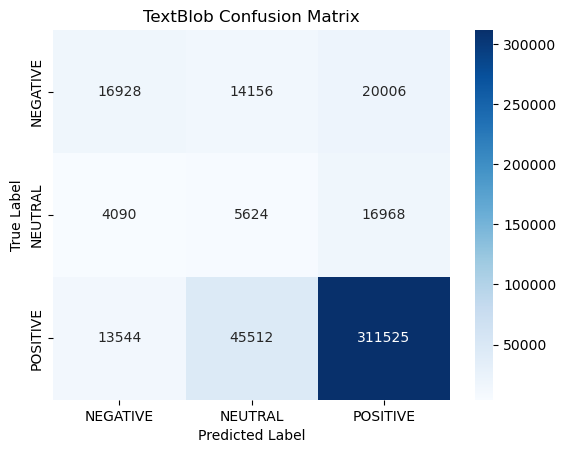

In [68]:
cm_textblob = confusion_matrix(df_textblob['label'], df_textblob['blob_sentiment_label'], labels=['NEGATIVE', 'NEUTRAL', 'POSITIVE'])
sns.heatmap(cm_textblob, annot=True, fmt="d", cmap="Blues", xticklabels=['NEGATIVE', 'NEUTRAL', 'POSITIVE'], yticklabels=['NEGATIVE', 'NEUTRAL', 'POSITIVE'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("TextBlob Confusion Matrix")
plt.show()

# Machine Learning

In [69]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

X_train_preprocessing = X_train_raw.apply(preprocessing_text)
X_train_clean = X_train_preprocessing.apply(clean_text_textblob)

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train_clean)
X_test_tfidf = tfidf.transform(X_test_blob)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

### LinearSVC

In [72]:
from sklearn.svm import LinearSVC
model_l_svm = LinearSVC()
model_l_svm.fit(X_train_tfidf, y_train_num)

y_pred_l_svm = model_l_svm.predict(X_test_tfidf)

report_l_svm = classification_report(y_test_num, y_pred_l_svm, output_dict=True)

cm_l_svm = confusion_matrix(y_test_num, y_pred_l_svm)
acc_l_svm = accuracy_score(y_test_num, y_pred_l_svm)
precision_l_svm = precision_score(y_test_num, y_pred_l_svm, average='weighted', zero_division=0)
recall_l_svm = recall_score(y_test_num, y_pred_l_svm, average='weighted', zero_division=0)   

### MLP

In [73]:
model_mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
model_mlp.fit(X_train_tfidf, y_train_num)

y_pred_mlp = model_mlp.predict(X_test_tfidf)

report_mlp = classification_report(y_test_num, y_pred_mlp, output_dict=True)

cm_mlp = confusion_matrix(y_test_num, y_pred_mlp)
acc_mlp = accuracy_score(y_test_num, y_pred_mlp)
precision_mlp = precision_score(y_test_num, y_pred_mlp, average='weighted', zero_division=0)
recall_mlp = recall_score(y_test_num, y_pred_mlp, average='weighted', zero_division=0)        

### Compare

In [74]:
# {0: "NEGATIVE", 1: "NEUTRAL", 2: "POSITIVE"}
inv_label_mapping = {v: k for k, v in label_mapping.items()}

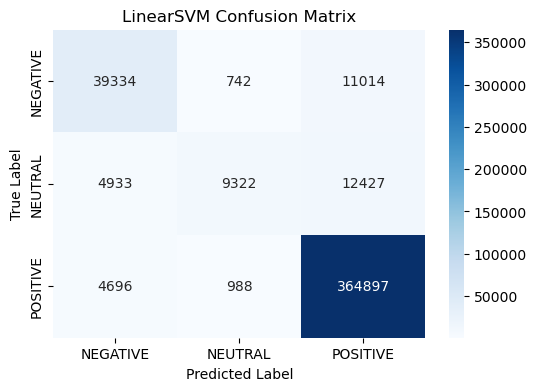

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = sorted(inv_label_mapping.keys())
string_labels = [inv_label_mapping[i] for i in labels]

plt.figure(figsize=(6, 4))
sns.heatmap(cm_l_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=string_labels,
            yticklabels=string_labels)
plt.title("LinearSVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

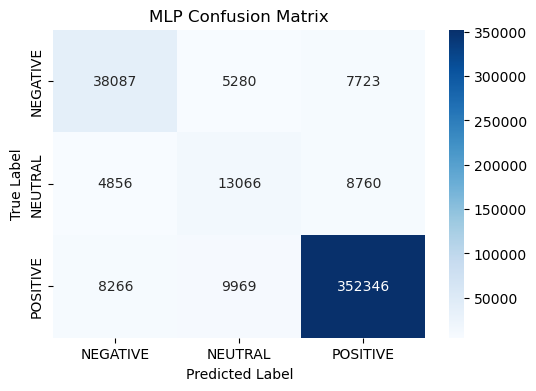

In [76]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues',
            xticklabels=string_labels,
            yticklabels=string_labels)
plt.title("MLP Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [80]:
import pandas as pd

l_svm_scores = {
    "Model": "LinearSVM",
    "Accuracy": acc_l_svm,
    "Precision": precision_l_svm,
    "Recall": recall_l_svm,
    "F1 Score": report_l_svm["weighted avg"]["f1-score"]
}

mlp_scores = {
    "Model": "MLP",
    "Accuracy": acc_mlp,
    "Precision": precision_mlp,
    "Recall": recall_mlp,
    "F1 Score": report_mlp["weighted avg"]["f1-score"]
}

# DataFrame
df_scores = pd.DataFrame([l_svm_scores, mlp_scores])

df_scores

,Model,Accuracy,Precision,Recall,F1 Score
0,LinearSVM,0.922383,0.918383,0.922383,0.913817
1,MLP,0.899958,0.901813,0.899958,0.900856


# Compare

In [101]:
label_name_mapping = label_map = {'0': 'NEGATIVE', '1': 'NEUTRAL', '2': 'POSITIVE'}

report_l_svm_named = {
    label_name_mapping.get(k, k): v for k, v in report_l_svm.items()
}

report_mlp_named = {
    label_name_mapping.get(k, k): v for k, v in report_mlp.items()
}

In [103]:
all_reports = {
    'VADER': report_vadr,
    'TextBlob': report_textblob,
    'LinearSVM': report_l_svm_named,
    'MLP': report_mlp_named,
}

In [111]:
neg_label = 'NEGATIVE'
neu_label = 'NEUTRAL'
pos_label = 'POSITIVE'

In [120]:
print(neg_label)
for model, report in all_reports.items():
    print(model)
    print(report[neg_label])

NEGATIVE
VADER
{'precision': 0.5666850907899854, 'recall': 0.5418281464082991, 'f1-score': 0.5539779265351865, 'support': 51090.0}
TextBlob
{'precision': 0.4897864706903536, 'recall': 0.33133685652769623, 'f1-score': 0.3952738990332975, 'support': 51090.0}
LinearSVM
{'precision': 0.8033412985315442, 'recall': 0.7698962614993149, 'f1-score': 0.7862632804613555, 'support': 51090.0}
MLP
{'precision': 0.7437559803940713, 'recall': 0.7454883538853004, 'f1-score': 0.7446211595421265, 'support': 51090.0}


In [121]:
print(neu_label)
for model, report in all_reports.items():
    print(model)
    print(report[neu_label])

NEUTRAL
VADER
{'precision': 0.09005868340015107, 'recall': 0.1742747919946031, 'f1-score': 0.11875119708868033, 'support': 26682.0}
TextBlob
{'precision': 0.08613612693745022, 'recall': 0.21077880218874148, 'f1-score': 0.12229543131754626, 'support': 26682.0}
LinearSVM
{'precision': 0.8434672457473761, 'recall': 0.34937410988681505, 'f1-score': 0.4940902104203106, 'support': 26682.0}
MLP
{'precision': 0.461451527458944, 'recall': 0.48969342627988904, 'f1-score': 0.4751531901740095, 'support': 26682.0}


In [122]:
print(pos_label)
for model, report in all_reports.items():
    print(model)
    print(report[pos_label])

POSITIVE
VADER
{'precision': 0.9163885463289553, 'recall': 0.8602302870357628, 'f1-score': 0.8874218458574825, 'support': 370581.0}
TextBlob
{'precision': 0.8939050040315755, 'recall': 0.8406394283570933, 'f1-score': 0.8664543583467764, 'support': 370581.0}
LinearSVM
{'precision': 0.9396376352558853, 'recall': 0.9846619227645238, 'f1-score': 0.9616230454106433, 'support': 370581.0}
MLP
{'precision': 0.9553099132660393, 'recall': 0.9507934837457938, 'f1-score': 0.9530463477637576, 'support': 370581.0}


In [124]:
acc = 'accuracy'
print(acc)
for model, report in all_reports.items():
    print(model)
    print(report[acc])

accuracy
VADER
0.783126242045888
TextBlob
0.7451204742691585
LinearSVM
0.9223825869348482
MLP
0.8999582917924046
